In [1]:
import matplotlib.pyplot as plt

import data_containers as dc
import traj_planner as tj

from importlib import reload 
reload(dc)
reload(tj)

<module 'traj_planner' from '/home/alessandro/repos/drone_flightplans/traj_planner.py'>

In [2]:
site=dc.Site("./coords/site.json")
site.set_origin()

planner = tj.TrajectoryPlanner(site)

/home/alessandro/repos/drone_flightplans/data_containers.py:132: UserWarning: No origin provided: assuming the barycenter of all telescopes as origin.
  warnings.warn("No origin provided: assuming the barycenter of all telescopes as origin.", UserWarning)


In [4]:
poi_enu = site.geodetic_to_enu(site.origin)

trajectory = planner.new_arc_trajectory_202412(
    nominal_poi = poi_enu, #poi with respect to which we compute the center of the arc
    nominal_az= 180,
    nominal_el= 47,
    nominal_srange= 500,
    # actual POI with respect to which we move
    poi = site.telescopes["class2"].enu,
    delta_el= 10,
    num_steps_el= 5,
)
trajectory.plot_boresight=True

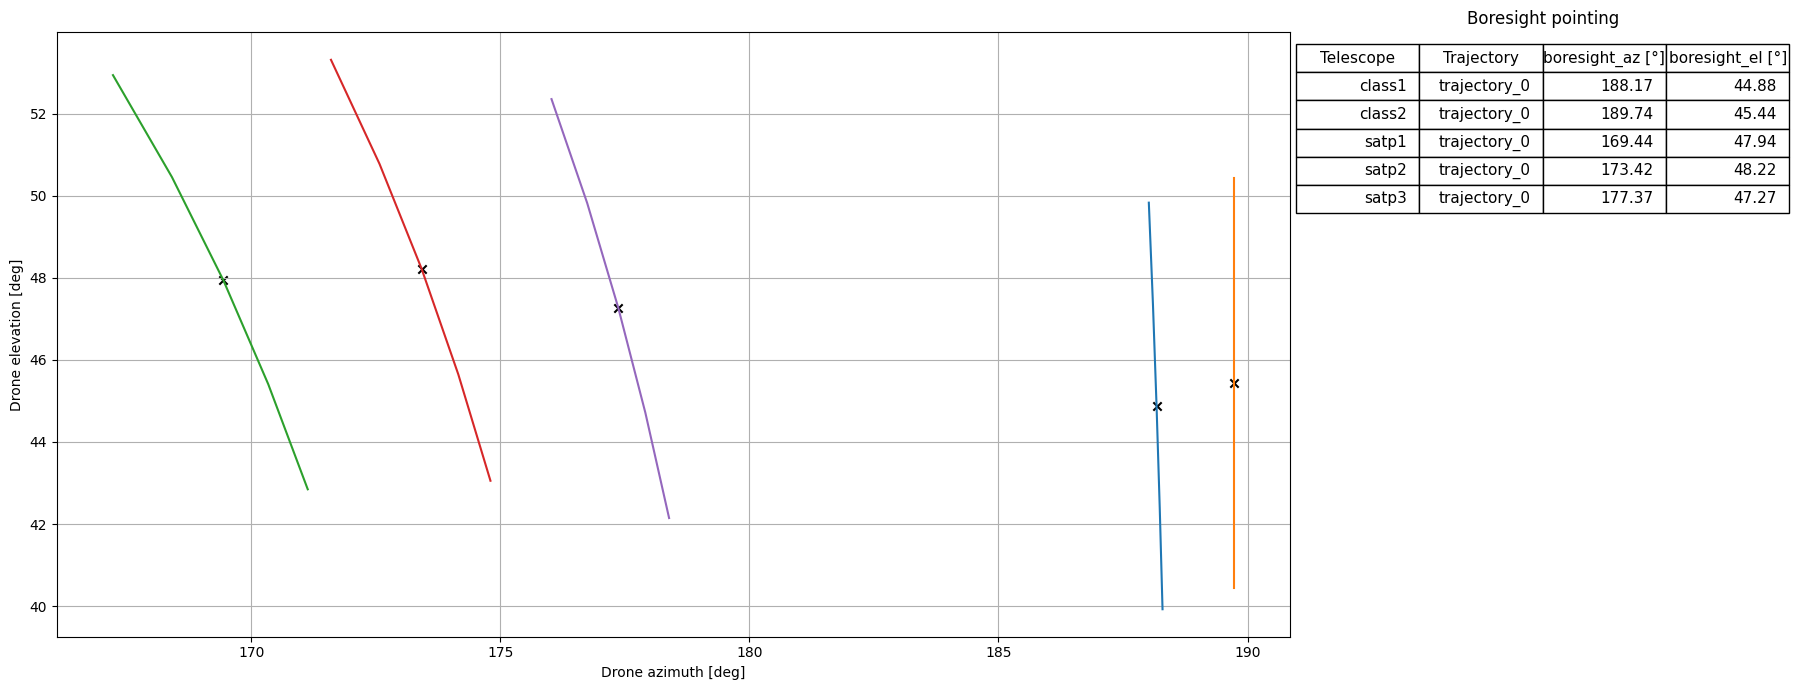

In [5]:
planner.plot_trajectories(trajectory, boresight_table=True)

In [10]:
import utils.qgc_utils as qgc
import trajectory_io as io

reload(qgc)
reload(io)

<module 'trajectory_io' from '/home/alessandro/repos/drone_flightplans/trajectory_io.py'>

In [7]:
mission = io.export_mission_qgc(trajectory, 10, 1.5, 5, savepath="outputs/load_test.plan", safety_waypoints="south", fence=True)

In [8]:
mission = io.export_mission_litchi(trajectory, 10, 1.5, 5, savepath="outputs/load_test.csv", safety_waypoints="south")

In [9]:
mission = io.export_mission_mp(trajectory, 10, 1.5, 5, savepath="outputs/load_test.waypoints", safety_waypoints="south")

In [10]:
site=dc.Site("./coords/site.json")
site.set_origin()
barycenter_enu = site.geodetic_to_enu(site.compute_barycenter())

planner = tj.TrajectoryPlanner(site)

/home/alessandro/repos/drone_flightplans/data_containers.py:132: UserWarning: No origin provided: assuming the barycenter of all telescopes as origin.
  warnings.warn("No origin provided: assuming the barycenter of all telescopes as origin.", UserWarning)


/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


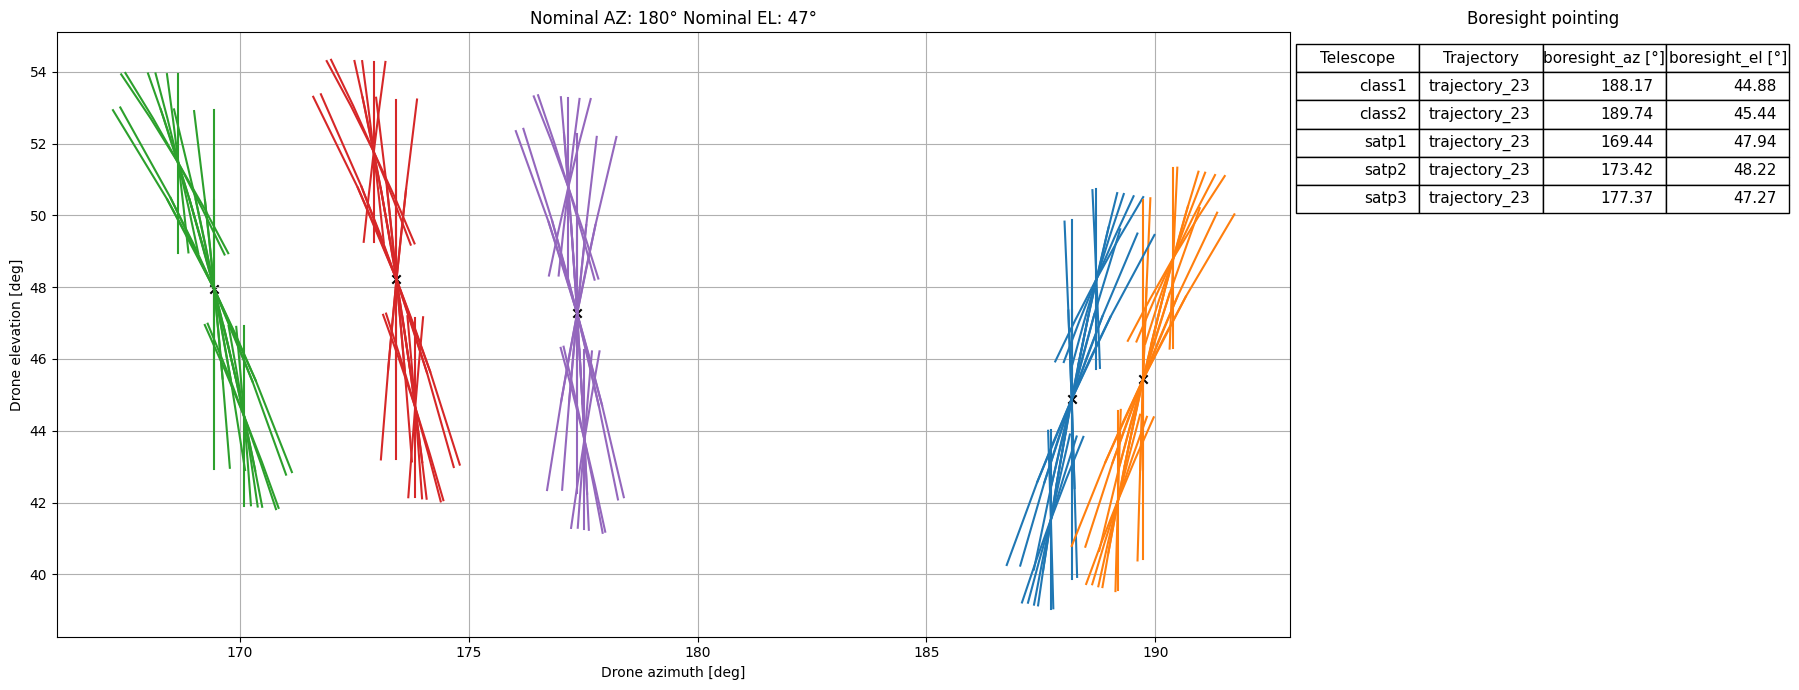

/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


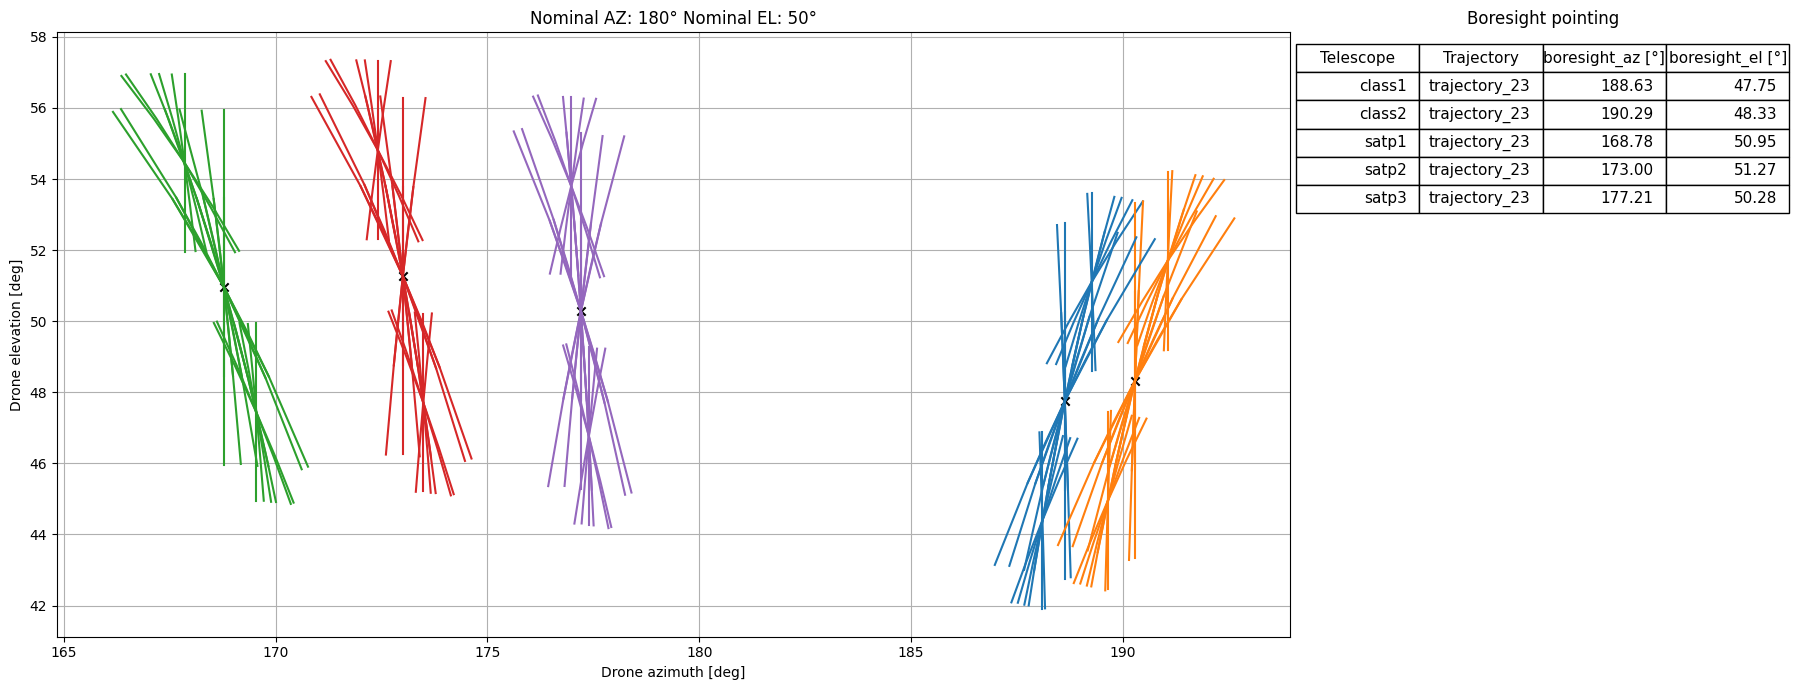

/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


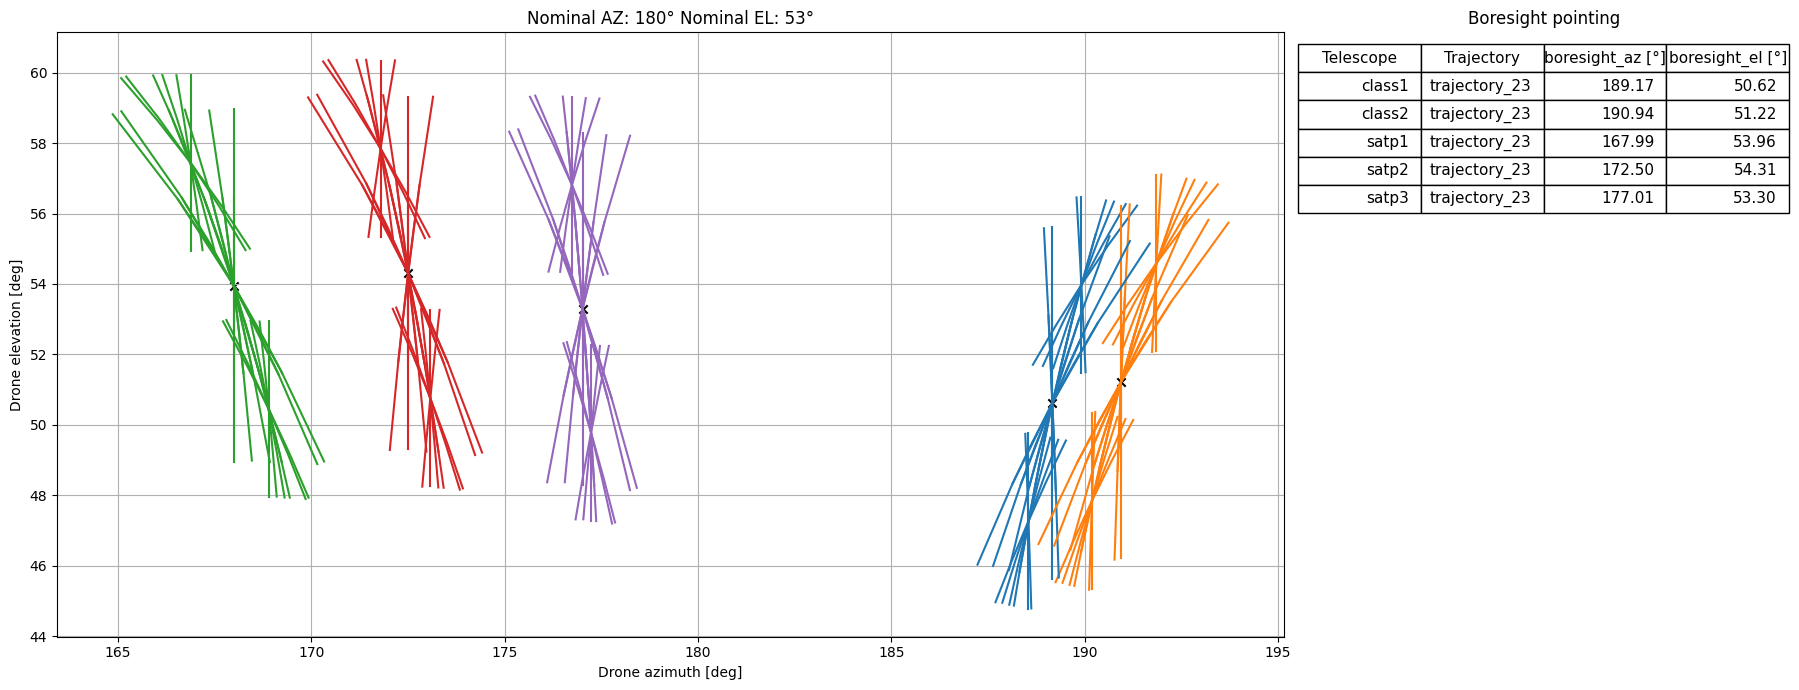

/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


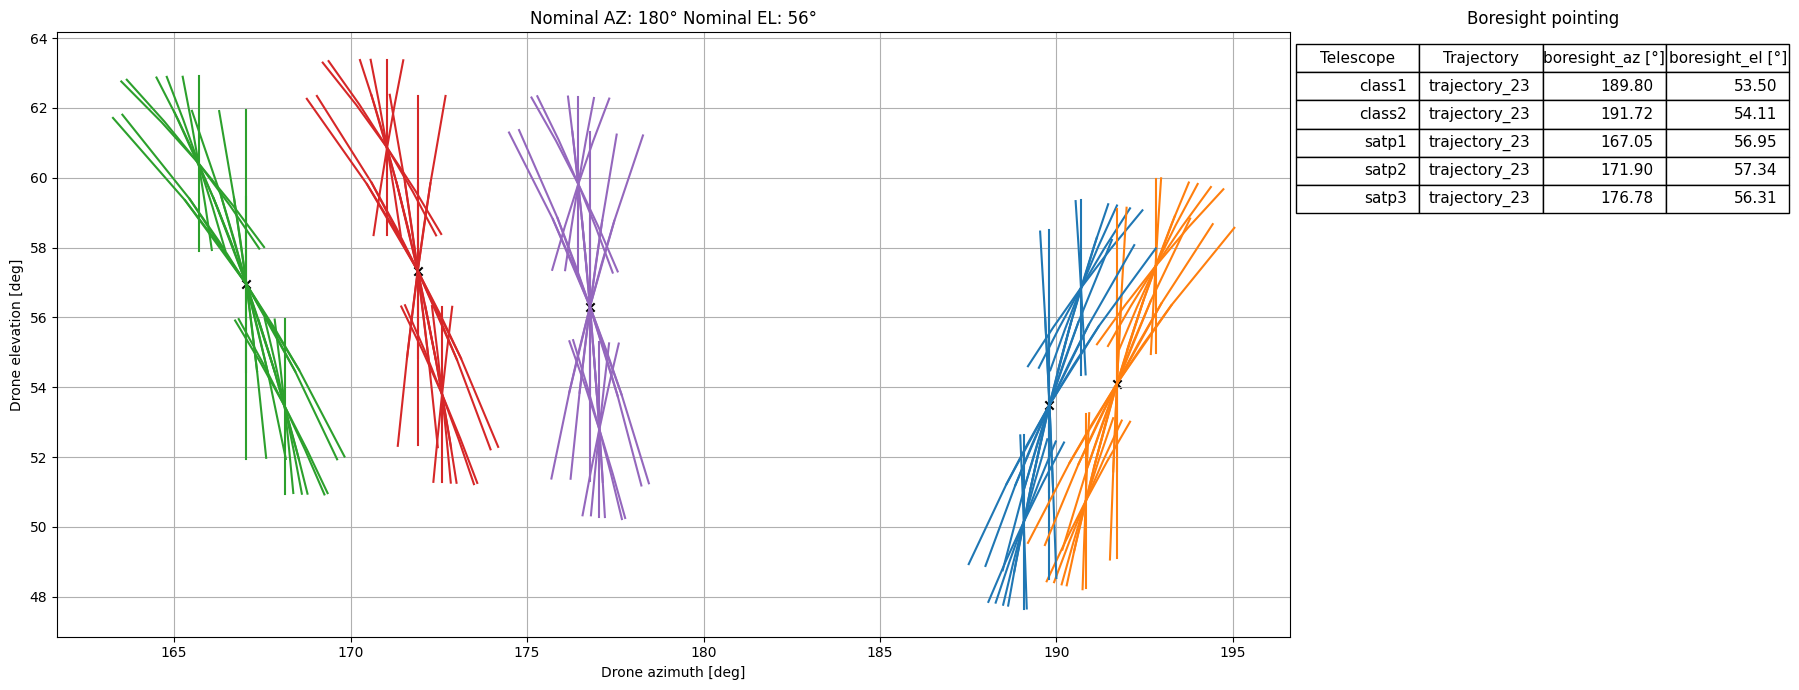

/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


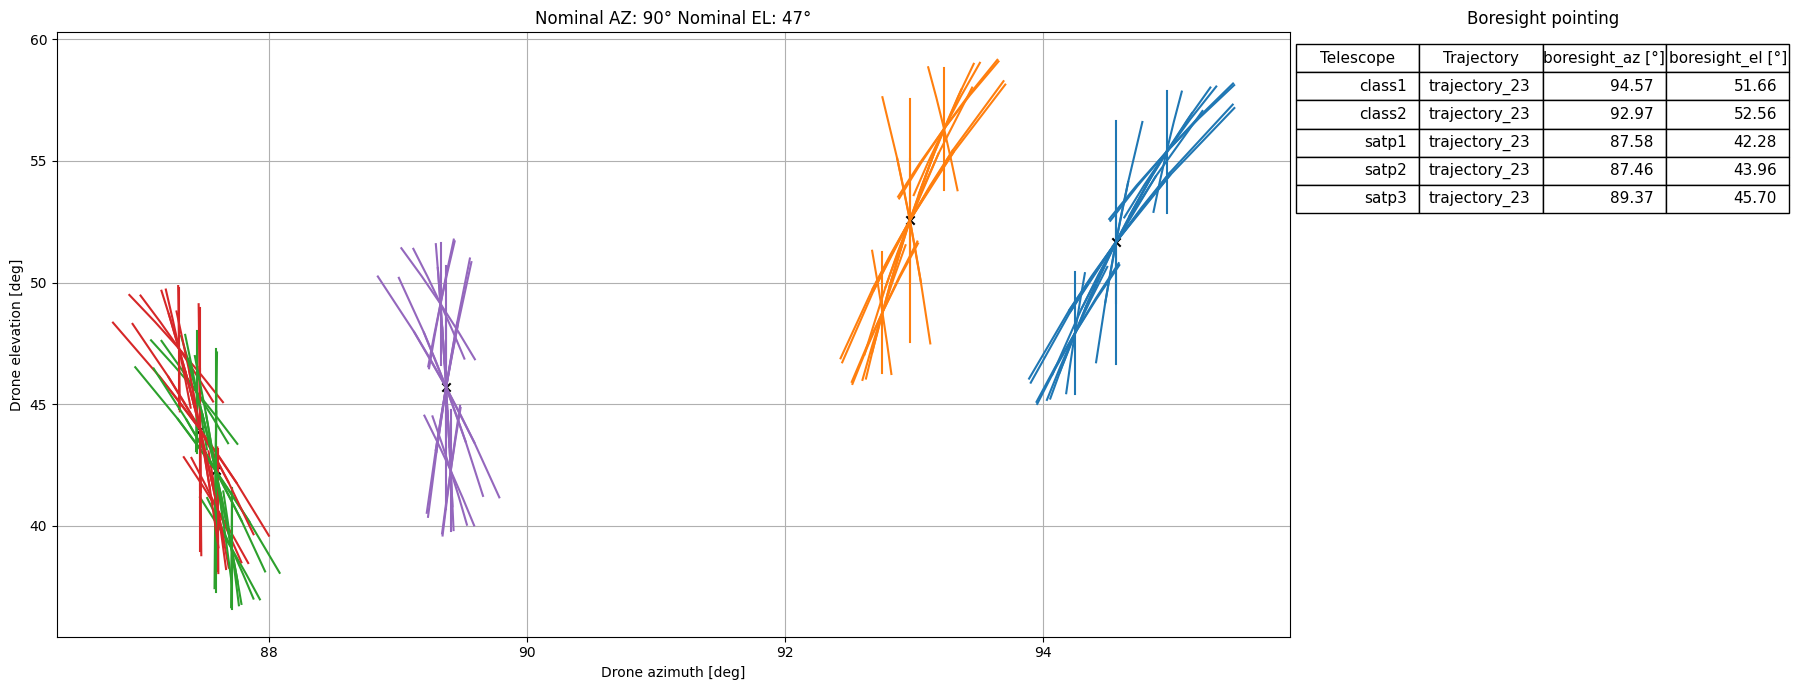

/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


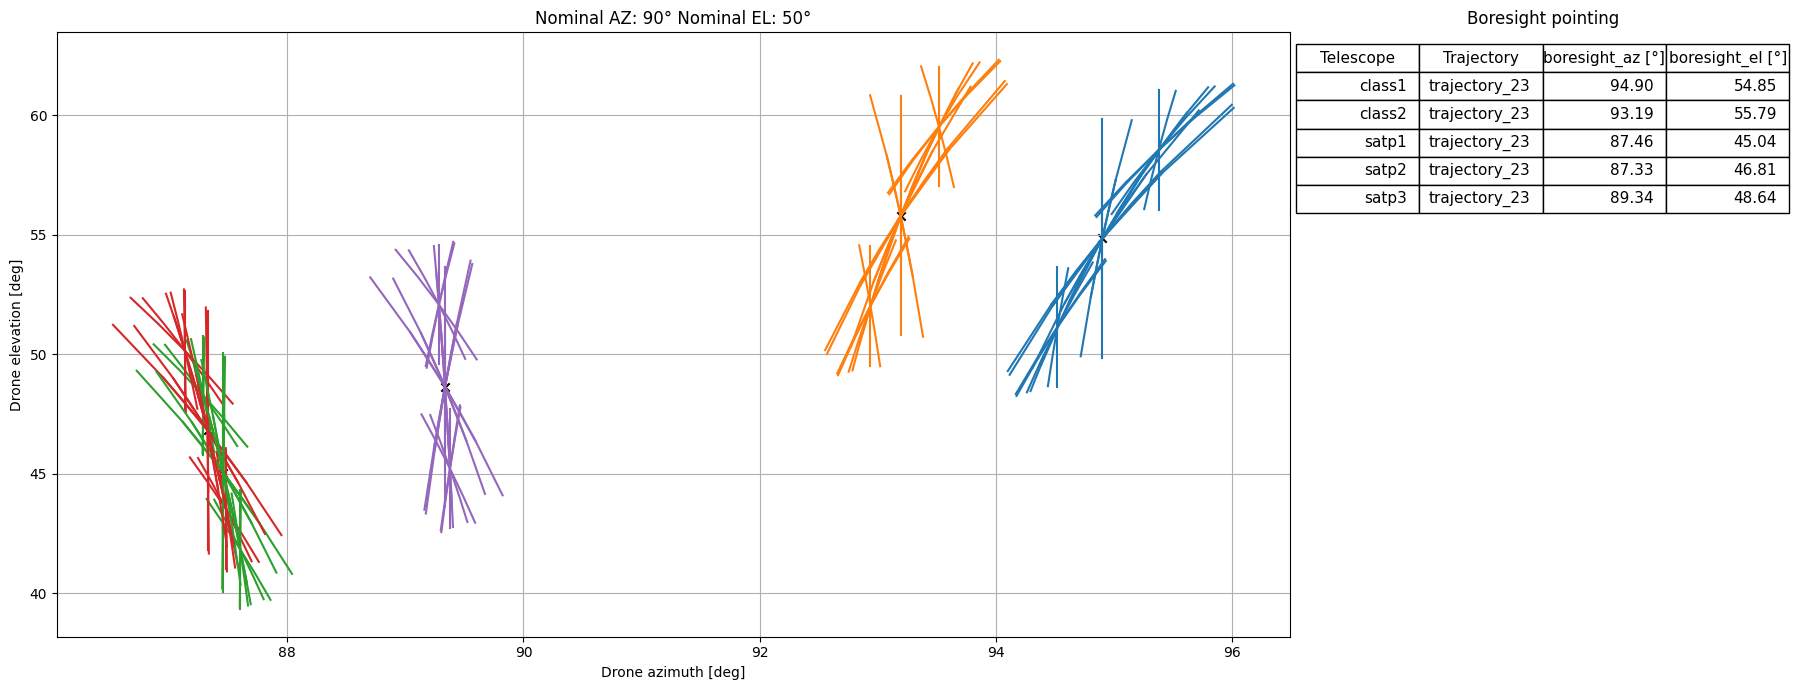

/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


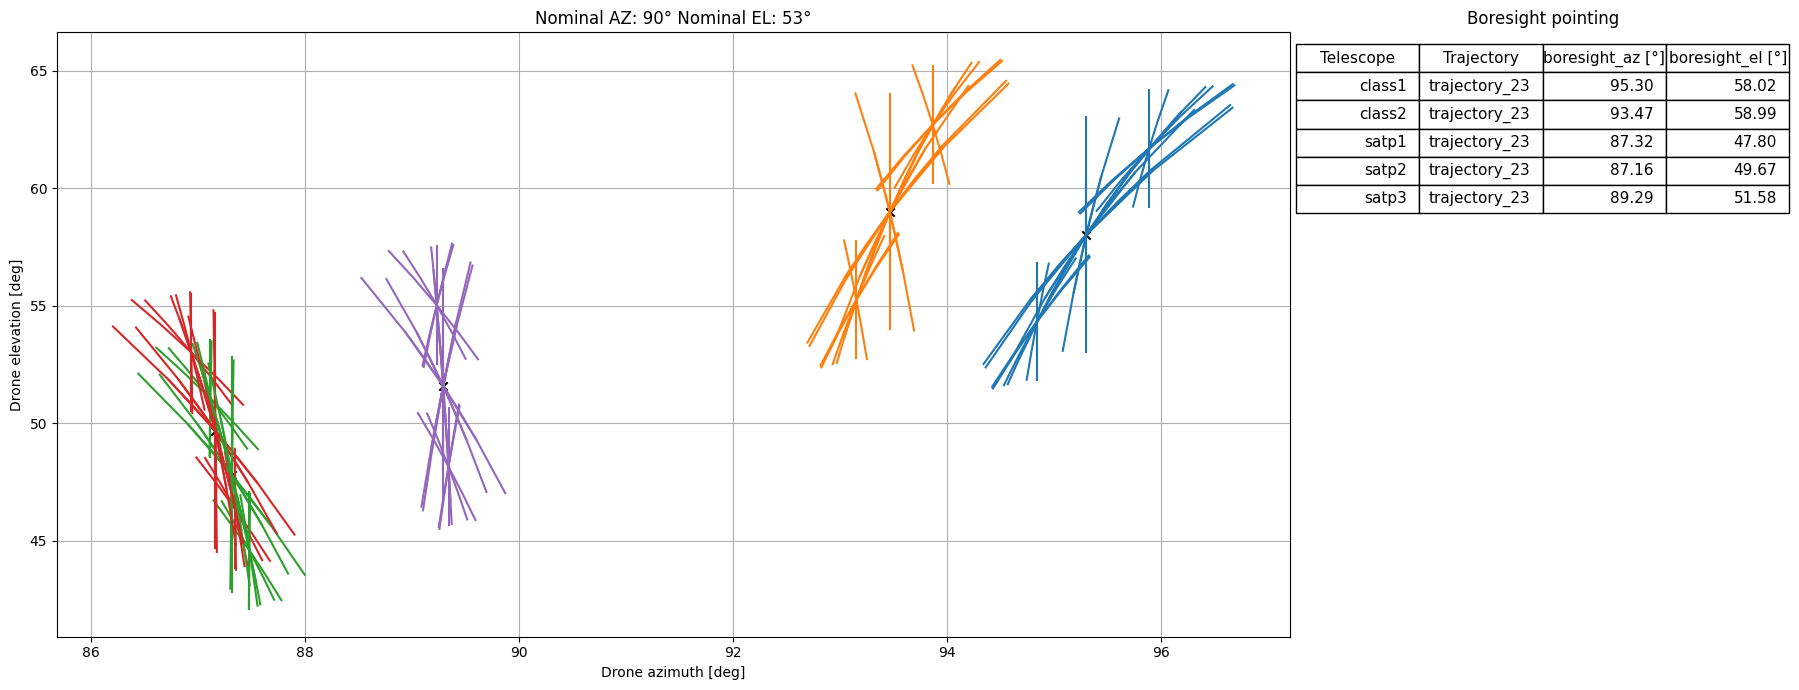

/home/alessandro/repos/drone_flightplans/traj_planner.py:187: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


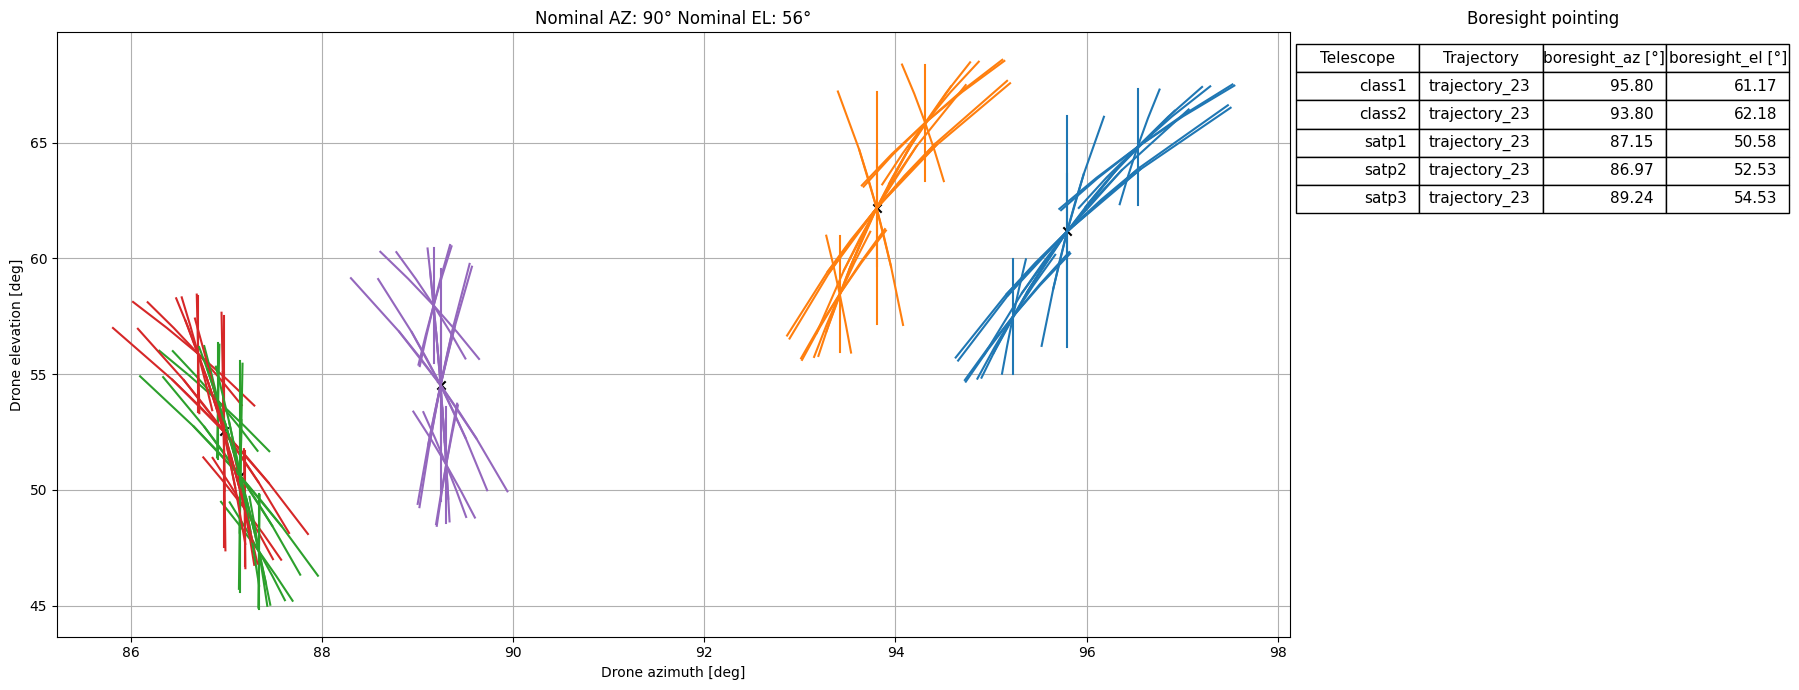

In [11]:
#nominal flights

azs = [180, 90]
els = [47, 50, 53, 56]
srange=500
secs = ["mid", "top", "bott", "full"]
pois = ["class1", "class2", "satp1", "satp2", "satp3", "barycenter"]


for az in azs:
    for el in els:

        trajectories=[]
        for sec in secs:
            for poi_name in pois:

                if poi_name=="barycenter":
                    poi=barycenter_enu
                else:
                    poi = site.telescopes[poi_name].enu

                if sec =="full":
                    delta_el=10
                    el_shift=0
                elif sec=="mid":
                    delta_el=5
                    el_shift=0
                elif sec=="top":
                    delta_el=5
                    el_shift= 3.5
                elif sec=="bott":
                    delta_el=5
                    el_shift= -3.5
                
                trajectory = planner.new_arc_trajectory_202412(
                    nominal_poi = barycenter_enu, #poi with respect to which we compute the center of the arc
                    nominal_az= az,
                    nominal_el= el+el_shift,
                    nominal_srange= srange,
                    # actual POI with respect to which we move
                    poi = poi,
                    delta_el= delta_el,
                    num_steps_el= 5,
                )
                if sec=="full" and poi_name=="barycenter":
                    trajectory.plot_boresight=True
                else:
                    trajectory.plot_boresight=False
                trajectories.append(trajectory)

                if az==180:
                    safety = "south"
                elif az==90:
                    safety = "east"

                dir_path="./outputs/2025_12/"
                name = "NOMINAL_{}_el{:d}_{}_{}".format(safety.upper(), int(el), sec.upper(), poi_name.upper())
                
                #io.export_mission_qgc(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath=dir_path+"qgc/nominal/"+name+".plan", safety_waypoints=safety, fence=True)
                #io.export_mission_litchi(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath=dir_path+"litchi/nominal/"+name+".csv", safety_waypoints=safety)
                #io.export_mission_mp(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath=dir_path+"mp/nominal/"+name+".waypoints", safety_waypoints=safety)
        
        planner.plot_trajectories(trajectories, 
                                  boresight_table=True,
                                  title="Nominal AZ: {:d}° Nominal EL: {:d}°".format(int(az), int(el)),
                                  save_path= dir_path+"plots/nominal/nominal_az{:d}_el{:d}.pdf".format(int(az), int(el))
                                 )
    
                

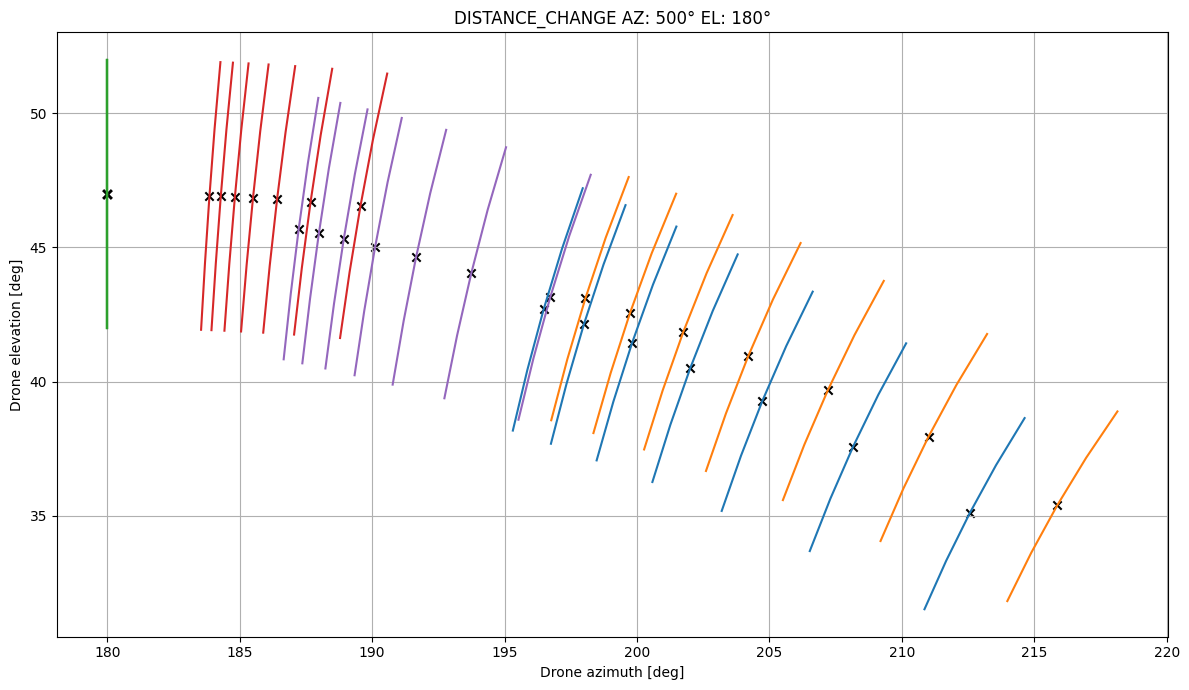

In [12]:
#thermal_loading flights (at various distances to check the thermal emission of the drone)
# NOTE THAT I BUILD THE ARC WITH RESPECT TO THE TELESCOPE USED AS POI
# This way even at different distances the drone will always be in the same position for the telescope
azs = [180]
els = [47]
sranges = [200,250,300,350,400,450,500]
secs = [ "full"]
pois = ["satp1"]


for az in azs:
    for el in els:

        trajectories=[]
        for sec in secs:
            for poi_name in pois:
                for srange in sranges:
                    
                    if poi_name=="barycenter":
                        poi=barycenter_enu
                    else:
                        poi = site.telescopes[poi_name].enu
    
                    if sec =="full":
                        delta_el=10
                        el_shift=0
                    elif sec=="mid":
                        delta_el=5
                        el_shift=0
                    elif sec=="top":
                        delta_el=5
                        el_shift= 3.5
                    elif sec=="bott":
                        delta_el=5
                        el_shift= -3.5
                    
                    trajectory = planner.new_arc_trajectory_202412(
                        nominal_poi = poi, #poi with respect to which we compute the center of the arc
                        nominal_az= az,
                        nominal_el= el+el_shift,
                        nominal_srange= srange,
                        # actual POI with respect to which we move
                        poi = poi,
                        delta_el= delta_el,
                        num_steps_el= 5,
                    )
                    
                    trajectory.plot_boresight=True

                    trajectories.append(trajectory)
    
                    if az==180:
                        safety = "south"
                    elif az==90:
                        safety = "east"
    
                    dir_path="./outputs/2025_12/"
                    name = "DISTANCES_{}_srange{:d}_el{:d}_{}_{}".format(safety.upper(),int(srange), int(el), sec.upper(), poi_name.upper())
                    
                    #io.export_mission_qgc(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath=dir_path+"qgc/distances/"+name+".plan", safety_waypoints=safety, fence=True)
                    #io.export_mission_litchi(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath=dir_path+"litchi/distances/"+name+".csv", safety_waypoints=safety)
                    #io.export_mission_mp(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath=dir_path+"mp/distances/"+name+".waypoints", safety_waypoints=safety)
        
        planner.plot_trajectories(trajectories, 
                                  boresight_table=False,
                                  title="DISTANCE_CHANGE AZ: {:d}° EL: {:d}°".format(int(srange), int(az), int(el)),
                                  save_path= dir_path+"plots/distances/{}_az{:d}_el{:d}.pdf".format(poi_name.upper(), int(az), int(el))
                                 )
    
                

In [7]:
#small test arc
poi=site.geodetic_to_enu(site.landing_site)
srange=30
trajectory = planner.new_arc_trajectory_202412(
                        nominal_poi = poi, #poi with respect to which we compute the center of the arc
                        nominal_az= 135,
                        nominal_el= 45,
                        nominal_srange= srange,
                        # actual POI with respect to which we move
                        poi = poi,
                        delta_el= 60,
                        num_steps_el= 5,
                    )

dir_path="./outputs/2025_12/"
name="TEST_SMALL_ARC_SOUTHEAST_{:d}mt".format(srange)

io.export_mission_qgc(trajectory, move_speed=10, scan_speed=1.5, n_repeat=3, savepath=dir_path+"qgc/tests/"+name+".plan", safety_waypoints=None, fence=True)
io.export_mission_litchi(trajectory, move_speed=10, scan_speed=1.5, n_repeat=3, savepath=dir_path+"litchi/tests/"+name+".csv", safety_waypoints=None)
io.export_mission_mp(trajectory, move_speed=10, scan_speed=1.5, n_repeat=3, savepath=dir_path+"mp/tests/"+name+".waypoints", safety_waypoints=None)
pass    

/home/alessandro/repos/drone_flightplans/trajectory_io.py:46: UserWarning: No safety points specified!
Use safety_waypoints='south'/'north'/etc
  warnings.warn("No safety points specified!\nUse safety_waypoints='south'/'north'/etc", UserWarning)
/home/alessandro/repos/drone_flightplans/trajectory_io.py:229: UserWarning: No safety points specified!
Use safety_waypoints='south'/'north'/etc
  warnings.warn("No safety points specified!\nUse safety_waypoints='south'/'north'/etc", UserWarning)


In [11]:
#changing poi tests
landing_site = site.landing_site
poi1 = site.telescopes["class2"].geodetic
poi2 = site.telescopes["satp3"].geodetic
savepath="./outputs/2025_12/mp/tests/switching_pois.waypoints"
io.export_test_mission_mp_switching_pois(landing_site, poi1, poi2, savepath = savepath)

'QGC WPL 110\n0\t0\t3\t16\t0.000000\t0.000000\t0.000000\t0.000000\t-22.95969026\t-67.78694688\t5135.000000\t1\n1\t0\t2\t178\t0.000000\t1.000000\t0.000000\t0.000000\t0.00000000\t0.00000000\t0.000000\t1\n2\t0\t3\t16\t0.000000\t0.000000\t0.000000\t0.000000\t-22.95969026\t-67.78694688\t10.000000\t1\n3\t0\t2\t19\t10.000000\t0.000000\t0.000000\t0.000000\t0.00000000\t0.00000000\t0.000000\t1\n4\t0\t3\t195\t0.000000\t0.000000\t0.000000\t0.000000\t-22.95969026\t-67.78694688\t0.000000\t1\n5\t0\t2\t19\t10.000000\t0.000000\t0.000000\t0.000000\t0.00000000\t0.00000000\t0.000000\t1\n6\t0\t3\t195\t0.000000\t0.000000\t0.000000\t0.000000\t-22.95979071\t-67.78720175\t0.478000\t1\n7\t0\t2\t19\t10.000000\t0.000000\t0.000000\t0.000000\t0.00000000\t0.00000000\t0.000000\t1\n8\t0\t3\t195\t0.000000\t0.000000\t0.000000\t0.000000\t-22.95979071\t-67.78720175\t0.478000\t1\n9\t0\t2\t19\t10.000000\t0.000000\t0.000000\t0.000000\t0.00000000\t0.00000000\t0.000000\t1\n10\t0\t3\t195\t0.000000\t0.000000\t0.000000\t0.000000\